In [74]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [138]:
#Reading Demographics CSV File
demographics=pd.read_csv('county_facts.csv')
primary = pd.read_csv('primary_results.csv')

In [52]:
demo = pd.read_csv('county_facts_dictionary.csv')

In [139]:
demographics = demographics[['fips','area_name','state_abbreviation','PST045214','RHI225214',
                             'RHI725214','RHI325214','RHI825214','EDU635213','EDU685213','INC110213','PVY020213','POP060210',
                             'VET605213','HSD410213','NES010213','SBO315207','SBO215207','SBO415207','SBO015207','INC910213','SEX255214']]
demographics.rename(columns={'PST045214': 'Population','RHI225214':'Black','RHI725214':'Latino','RHI325214':'AmericanIndian',
                            'RHI825214':'White','EDU635213':'HighSchool','EDU685213':'Bachelors',
                             'INC110213':'MediHouseInc','PVY020213':'Kurang Mampu','POP060210':'Density','VET605213':'Veteran',
                            'HSD410213':'Rumah Tangga','NES010213':'Pengangguran','SBO315207':'BlackownFirm','SBO215207':'AsianowmFirm',
                            'SBO415207':'LatinoownFirm','SBO015207':'WomenownFirm','INC910213':'incomepercapita','SEX255214':'Female'}, inplace=True)


In [78]:
# for col in demographics.columns: 
#     print(col) 

In [77]:
# demo

In [6]:
# df.hist() 
# plt.figure(figsize=(15,10)) 
# plt.show()

In [7]:
# plt.figure(figsize=(15,10)) 
# df.plot.box() 
# plt.show() 

#### Total Pemilih

In [46]:
VotesTotal = primary['votes'].sum()
print (f'Total Pemilih = {(VotesTotal )}')

Total Pemilih = 56759187


In [43]:
VotesRep = Rep['votes'].sum()

VotesR= round(((VotesRep / VotesTotal)*100),3)
print (f'Total Pemilih Republican = {(VotesR)} %')
Votes = VotesRep
print (f'Total Pemilih Republican = {(Votes )}')

Total Pemilih Republican = 51.267 %
Total Pemilih Republican = 29098686


In [44]:
VotesD = Dem['votes'].sum()

VotesDe= round(((VotesD / VotesTotal)*100),3)
print (f'Total Pemilih Democrat = {(VotesDe)} %')
Vote = VotesD
print (f'Total Pemilih Democrat = {(Vote )}')

Total Pemilih Democrat = 48.733 %
Total Pemilih Democrat = 27660458


In [45]:
votes = results[results.party == "Republican"]
votes = results.groupby(['state_abbreviation', 'county']).sum()
# votes

### Republican

In [79]:
#Reading Results CSV File
results = pd.read_csv('primary_results.csv')
results = results[results.party == "Republican"]
# results = results[(results.state != "Maine") & (results.state != "Massachusetts") & (results.state != "Vermont") & (results.state != "Illinois") ]
# results = results[(results.candidate != 'No Preference') & (results.candidate != ' Uncommitted')]
results = results[(results.candidate == "Donald Trump") |(results.candidate != "Donald Trump") ]
Rep = results
Rep.head()
Rep.candidate.unique()


array(['Ben Carson', 'Donald Trump', 'John Kasich', 'Marco Rubio',
       'Ted Cruz', 'Carly Fiorina', 'Chris Christie', 'Jeb Bush',
       'Mike Huckabee', 'Rand Paul', 'Rick Santorum'], dtype=object)

In [141]:
#Calculating statewise total votes and fraction votes (Republic)
votesByState = [[candidate, state, party] for candidate in Rep.candidate.unique() for state in Rep.state.unique() 
                for party in Rep.party.unique()]
for i in votesByState:
    i.append(Rep[(Rep.candidate == i[0]) & (Rep.state == i[1])].votes.sum())
    i.append(i[3]*1.0/Rep[Rep.state == i[1]].votes.sum())
vbsRep = pd.DataFrame(votesByState, columns = ['candidate', 'state', 'party', 'votes','partyFrac'])
# vbsRep.head()

In [142]:
#Merging demographics and results
allDataRep = pd.merge(vbsRep, demographics, how="inner", left_on = 'state',right_on = 'area_name')
allDataRep.drop('state_abbreviation',axis=1, inplace=True)
allDataRep.head()
# #Segregate data candidate wise
DNT = allDataRep[(allDataRep.candidate == "Donald Trump")] #| (allData.candidate != "Donald Trump")]
DNT = DNT.reset_index();
DNT.drop('index',axis=1, inplace=True)
DNT.head()

,candidate,state,party,votes,partyFrac,fips,area_name,Population,Black,Latino,...,Density,Veteran,Rumah Tangga,Pengangguran,BlackownFirm,AsianowmFirm,LatinoownFirm,WomenownFirm,incomepercapita,Female
0,Donald Trump,Alabama,Republican,371735,0.443793,1000,Alabama,4849377,26.7,4.1,...,94.4,388865,1838683,311578,14.8,1.8,1.2,28.1,23680,51.5
1,Donald Trump,Alaska,Republican,7346,0.334975,2000,Alaska,736732,3.9,6.8,...,1.2,71004,251899,52991,1.5,3.1,0.0,25.9,32651,47.4
2,Donald Trump,Arizona,Republican,249916,0.574384,4000,Arizona,6731484,4.7,30.5,...,56.3,522382,2370289,420233,2.0,3.3,10.7,28.1,25358,50.3
3,Donald Trump,Arkansas,Republican,133144,0.335779,5000,Arkansas,2966369,15.6,7.0,...,56.0,237311,1129723,191530,5.5,1.4,2.3,24.5,22170,50.9
4,Donald Trump,California,Republican,1174829,0.785537,6000,California,38802500,6.5,38.6,...,239.1,1893539,12542460,2983996,4.0,14.9,16.5,30.3,29527,50.3


In [82]:
#Filter kandidat diatas 1%
votes = allDataRep['votes'] > 14000
candidate = allDataRep['candidate'] 
dfRep = allDataRep[votes & candidate]
# dfRep

In [83]:
#Ukuran persebaran jumlah pemilih pada setiap kandidat di seluruh negara bagian
fig = px.strip(dfRep, x="state", y="votes", orientation="v", color="candidate")
fig.show()

In [84]:
# Kandidat Mayoritas Republican
fig = px.bar(dfRep, x="party", y='votes' , color='candidate' ,orientation="v", barmode="group")
fig.show()

### Democrat

In [143]:
resultss=pd.read_csv('primary_results.csv')
resultss = resultss[resultss.party == 'Democrat']
# results = results[(resultss.state != "Maine") & (resultss.state != "Massachusetts") & (resultss.state != "Vermont") & (resultss.state != "Illinois") ]
resultss = resultss[(resultss.candidate != 'No Preference') & (resultss.candidate != ' Uncommitted')]
# resultss = resultss[(resultss.candidate == "Hillary Clinton") |(resultss.candidate != "Hillary Clinton") ]
Dem = resultss
Dem[:1]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182


In [144]:
#Calculating statewise total votes and fraction votes (Republic)
votesByState = [[candidate, state, party] for candidate in Dem.candidate.unique() for state in Dem.state.unique() 
                for party in Dem.party.unique()]
for i in votesByState:
    i.append(Dem[(Dem.candidate == i[0]) & (Dem.state == i[1])].votes.sum())
    i.append(i[3]*1.0/Dem[Dem.state == i[1]].votes.sum())
vbsDem = pd.DataFrame(votesByState, columns = ['candidate', 'state', 'party', 'votes','partyFrac'])
vbsDem.head()

,candidate,state,party,votes,partyFrac
0,Bernie Sanders,Alabama,Democrat,76399,0.197757
1,Bernie Sanders,Alaska,Democrat,440,0.816327
2,Bernie Sanders,Arizona,Democrat,163400,0.409424
3,Bernie Sanders,Arkansas,Democrat,64868,0.309709
4,Bernie Sanders,California,Democrat,1502043,0.436308


In [145]:
#Merging demographics and results
allDataDem = pd.merge(vbsDem, demographics, how="inner", left_on = 'state',right_on = 'area_name')
allDataDem.drop('state_abbreviation',axis=1, inplace=True)
# allData.head()
#Segregate data candidate wise
Hill= allDataDem[(allDataDem.candidate == "Hillary Clinton")] # | (allData11.candidate != "Hillary Clinton")]
# Hill = allData11[(allData11.candidate != 'No Preference') & (allData11.candidate != ' Uncommitted')]
Hill = Hill.reset_index();
Hill.drop('index',axis=1, inplace=True)
Hill.head()


,candidate,state,party,votes,partyFrac,fips,area_name,Population,Black,Latino,...,Density,Veteran,Rumah Tangga,Pengangguran,BlackownFirm,AsianowmFirm,LatinoownFirm,WomenownFirm,incomepercapita,Female
0,Hillary Clinton,Alabama,Democrat,309928,0.802243,1000,Alabama,4849377,26.7,4.1,...,94.4,388865,1838683,311578,14.8,1.8,1.2,28.1,23680,51.5
1,Hillary Clinton,Alaska,Democrat,99,0.183673,2000,Alaska,736732,3.9,6.8,...,1.2,71004,251899,52991,1.5,3.1,0.0,25.9,32651,47.4
2,Hillary Clinton,Arizona,Democrat,235697,0.590576,4000,Arizona,6731484,4.7,30.5,...,56.3,522382,2370289,420233,2.0,3.3,10.7,28.1,25358,50.3
3,Hillary Clinton,Arkansas,Democrat,144580,0.690291,5000,Arkansas,2966369,15.6,7.0,...,56.0,237311,1129723,191530,5.5,1.4,2.3,24.5,22170,50.9
4,Hillary Clinton,California,Democrat,1940580,0.563692,6000,California,38802500,6.5,38.6,...,239.1,1893539,12542460,2983996,4.0,14.9,16.5,30.3,29527,50.3


In [91]:
Dem.candidate.unique()


array(['Bernie Sanders', 'Hillary Clinton', "Martin O'Malley",
       ' No Preference'], dtype=object)

In [92]:
# aaa = primary.groupby("state_abbreviation").sum()
# aaa = primary.groupby('party').sum()
# aaa

In [93]:
# E = primary.groupby("party").sum()
# E= E /(len(E))
# E

In [94]:
#Filter kandidat mayoritas di demokrat
votesDem = allDataDem['votes'] > 20000
candidateDem = allDataDem['candidate'] 
dfDem = allDataDem[votesDem & candidateDem]
dfDem= dfDem[(dfDem['votes'] != 0 )] 
dfDem = dfDem.reset_index();
dfDem.drop('index',axis=1, inplace=True)
# dfDem

In [95]:
fig = px.bar(dfDem, x="party", y="votes", color="candidate", barmode="group")
fig.show()

In [96]:
fig = px.strip(dfDem, x="state", y="votes", orientation="v", color="candidate")
fig.show()

In [97]:
a = primary.groupby("party").sum()
aaa = primary.groupby("candidate").sum()

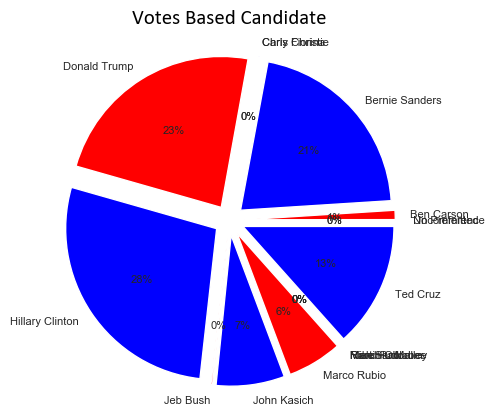

In [98]:
bbb = aaa.index
ccc = aaa.votes
colors =['red','blue']
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8,5),dpi=100)
plt.pie(ccc, labels=bbb, colors=colors, autopct='%1.0f%%', shadow=False, textprops={'fontsize': 8},
        startangle=0, explode=(.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1))
plt.title('Votes Based Candidate',fontdict={'family':'calibri', 'size':15, 'color':'black'})
plt.show()

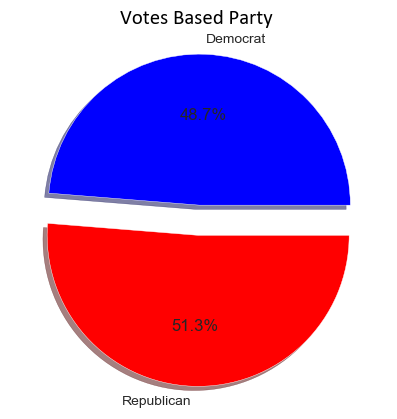

In [99]:
b = a.index
c = a.votes
colors =['blue','red']
plt.style.use('seaborn')
plt.figure(figsize=(8,5),dpi=100)
plt.pie(c, labels=b, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0, explode=(.1,.1))
plt.title('Votes Based Party ',
         fontdict={'family':'calibri', 'size':15, 'color':'black'})
plt.show()

### Hillary voter white vs income household based state

In [100]:
for col in demographics.columns: 
    print(col)

fips
area_name
state_abbreviation
Population
Black
Latino
AmericanIndian
White
HighSchool
Bachelors
MediHouseInc
Kurang Mampu
Density
Veteran
Rumah Tangga
Pengangguran
BlackownFirm
AsianowmFirm
LatinoownFirm
WomenownFirm
incomepercapita


In [101]:
# import seaborn as sns
# ax = sns.boxplot(x="Kurang Mampu", y="candidate", hue="candidate",
#                  data=DNT, orient='h')

#  Trump Vs Hillary Votes by county based on income, college, ethnicity and density:

### Hillary Clinton

In [103]:
#Pengangguran Vs White
fig = px.scatter(Hill, x="Pengangguran", y="White", color="partyFrac",
                 size='partyFrac')
fig.show()

In [149]:
#Pengangguran Vs White
fig = px.scatter(Hill, x="Female", y="White", color="partyFrac",
                 size='partyFrac')
fig.show()

In [105]:
# White vs Income
fig = px.scatter(Hill, x="MediHouseInc", y="White", color="partyFrac",
                 size='partyFrac')
fig.show()

In [154]:
#Bachelors vs White
fig = px.scatter(Hill, x="MediHouseInc", y="Bachelors", color="state",
                 size='partyFrac')
fig.show()

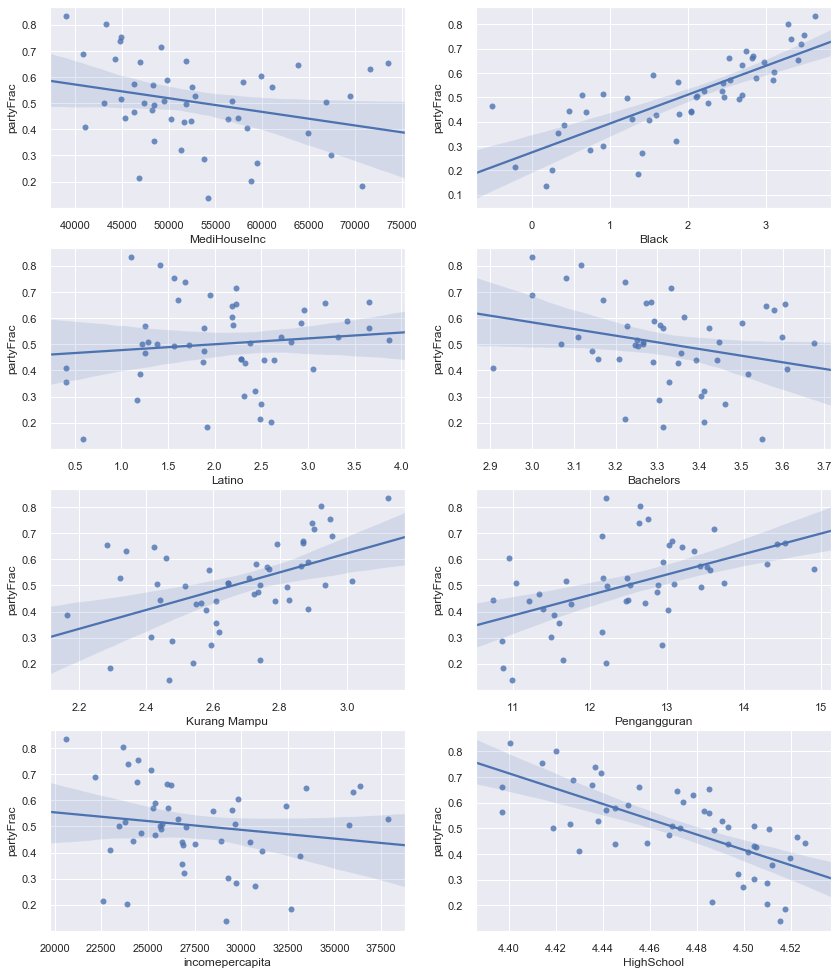

In [107]:
import seaborn as sns; sns.set(color_codes=True)

plt.figure(figsize=(14,17))

plt.subplot(421)

y =Hill['MediHouseInc']
ax = sns.regplot(x=y, y="partyFrac", data=Hill)


plt.subplot(422)

z = np.log(Hill['Black'], dtype='float64')
bx = sns.regplot(x=z, y="partyFrac", data=Hill)


plt.subplot(423)

x = np.log(Hill['Latino'], dtype='float64')
cx = sns.regplot(x=x, y="partyFrac", data=Hill)


plt.subplot(424)
w = np.log(Hill['Bachelors'], dtype='float64')
dx = sns.regplot(x=w, y="partyFrac", data=Hill)

plt.subplot(425)
x = np.log(Hill['Kurang Mampu'], dtype='float64')
cx = sns.regplot(x=x, y="partyFrac", data=Hill)


plt.subplot(426)
w = np.log(Hill['Pengangguran'], dtype='float64')
dx = sns.regplot(x=w, y="partyFrac", data=Hill)


plt.subplot(427)
x = Hill['incomepercapita']
cx = sns.regplot(x=x, y="partyFrac", data=Hill)


plt.subplot(428)
w = np.log(Hill['HighSchool'], dtype='float64')
dx = sns.regplot(x=w, y="partyFrac", data=Hill)

### Donald Trump

In [156]:
#White vs Pengangguran
fig = px.scatter(DNT, x="Female", y="White", color="partyFrac",
                 size='partyFrac')
fig.show()

In [160]:
#White vs Income
fig = px.scatter(DNT, x="Latino", y="White", color="state",
                 size='partyFrac')
fig.show()

In [167]:
#Bachelors vs Income
fig = px.scatter(DNT, x="Pengangguran", y="White", color="state",
                 size='partyFrac')
fig.show()

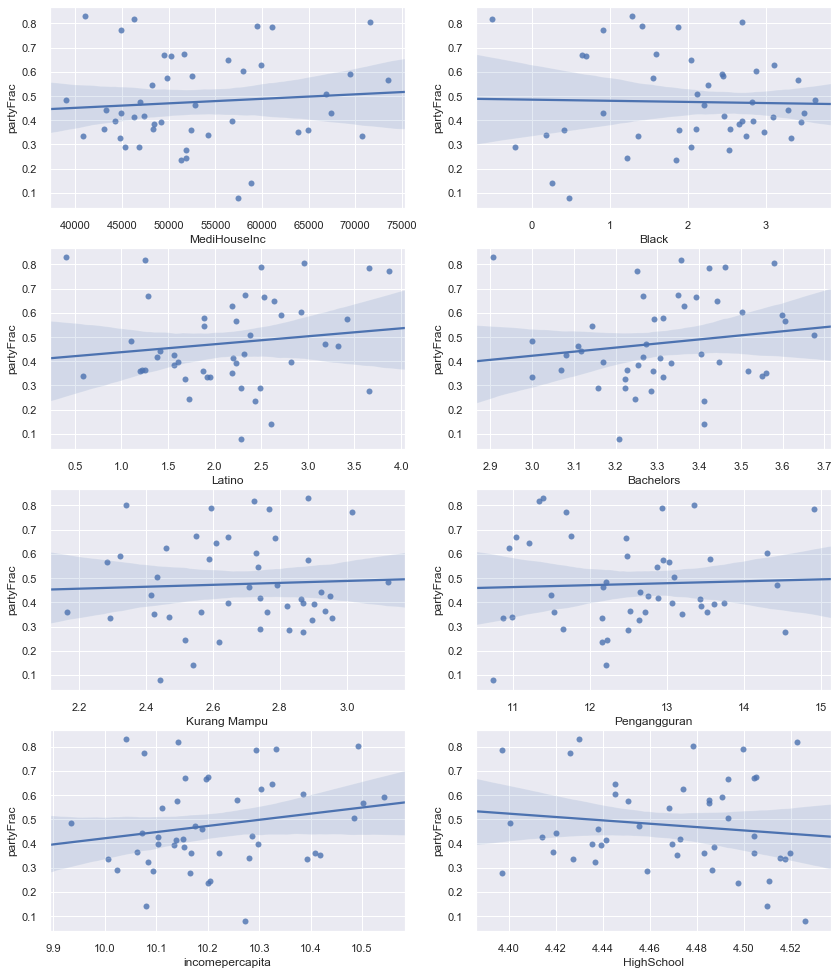

In [38]:
import seaborn as sns; sns.set(color_codes=True)

plt.figure(figsize=(14,17))

plt.subplot(421)

ydn =DNT['MediHouseInc']
axdn = sns.regplot(x=ydn, y="partyFrac", data=DNT)


plt.subplot(422)

zdn = np.log(DNT['Black'], dtype='float64')
bxdn = sns.regplot(x=zdn, y="partyFrac", data=DNT)


plt.subplot(423)

xdn = np.log(DNT['Latino'], dtype='float64')
cxdn = sns.regplot(x=xdn, y="partyFrac", data=DNT)


plt.subplot(424)
wdn = np.log(DNT['Bachelors'], dtype='float64')
dxdn = sns.regplot(x=wdn, y="partyFrac", data=DNT)

plt.subplot(425)

xdn = np.log(DNT['Kurang Mampu'], dtype='float64')
cxdn = sns.regplot(x=xdn, y="partyFrac", data=DNT)


plt.subplot(426)
wdn = np.log(DNT['Pengangguran'], dtype='float64')
dxdn = sns.regplot(x=wdn, y="partyFrac", data=DNT)

plt.subplot(427)

xdn = np.log(DNT['incomepercapita'], dtype='float64')
cxdn = sns.regplot(x=xdn, y="partyFrac", data=DNT)


plt.subplot(428)
wdn = np.log(DNT['HighSchool'], dtype='float64')
dxdn = sns.regplot(x=wdn, y="partyFrac", data=DNT)

### Head To Head

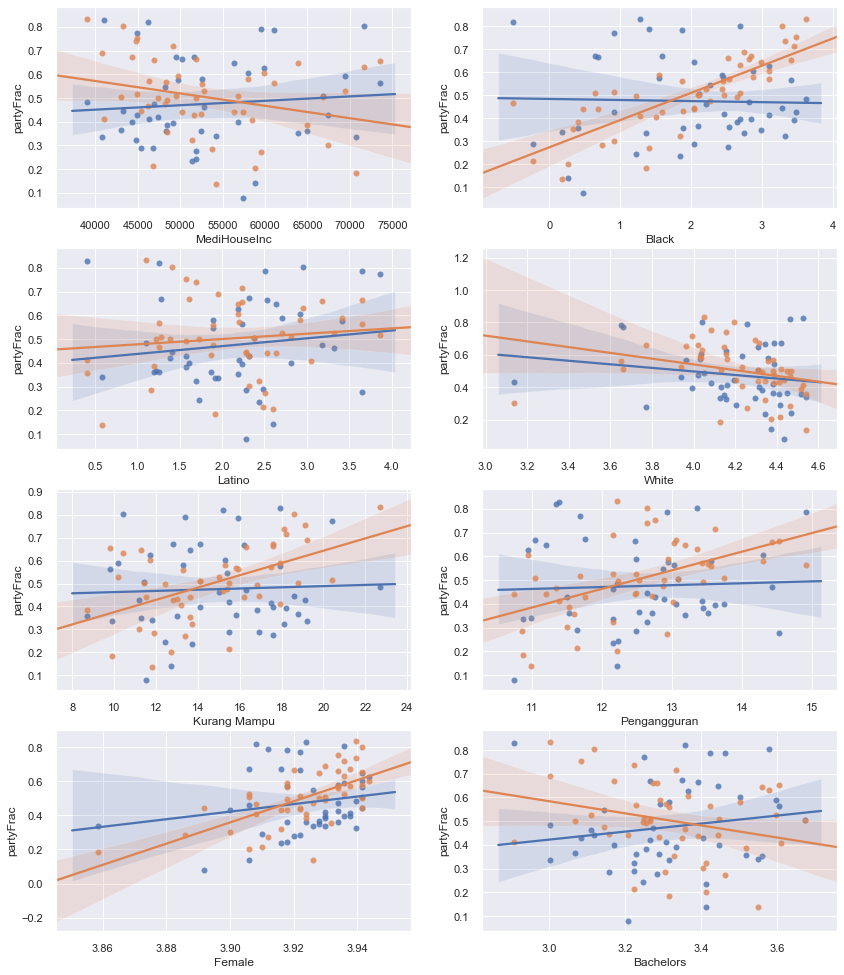

In [148]:
plt.figure(figsize=(14,17))

plt.subplot(421)

yDN =DNT['MediHouseInc']
axDN = sns.regplot(x=yDN, y="partyFrac", data=DNT)
yHill =Hill['MediHouseInc']
axHill = sns.regplot(x=yHill, y="partyFrac", data=Hill)

plt.subplot(422)

zDN= np.log(DNT['Black'], dtype='float64')
bxDN = sns.regplot(x=zDN, y="partyFrac", data=DNT)
zHill =np.log(Hill['Black'], dtype='float64')
bxHill = sns.regplot(x=zHill, y="partyFrac", data=Hill)


plt.subplot(423)

xDN = np.log(DNT['Latino'], dtype='float64')
cxDN = sns.regplot(x=xDN, y="partyFrac", data=DNT)
xHill =np.log(Hill['Latino'], dtype='float64')
cxHill = sns.regplot(x=xHill, y="partyFrac", data=Hill)

plt.subplot(424)
wDN = np.log(DNT['White'], dtype='float64')
dxDN = sns.regplot(x=wDN, y="partyFrac", data=DNT)
wHill =np.log(Hill['White'], dtype='float64')
cxHill = sns.regplot(x=wHill, y="partyFrac", data=Hill)

plt.subplot(425)

yDN =DNT['Kurang Mampu']
axDN = sns.regplot(x=yDN, y="partyFrac", data=DNT)
yHill =Hill['Kurang Mampu']
axHill = sns.regplot(x=yHill, y="partyFrac", data=Hill)

plt.subplot(426)

zDN= np.log(DNT['Pengangguran'], dtype='float64')
bxDN = sns.regplot(x=zDN, y="partyFrac", data=DNT)
zHill =np.log(Hill['Pengangguran'], dtype='float64')
bxHill = sns.regplot(x=zHill, y="partyFrac", data=Hill)


plt.subplot(427)

xDN = np.log(DNT['Female'], dtype='float64')
cxDN = sns.regplot(x=xDN, y="partyFrac", data=DNT)
xHill =np.log(Hill['Female'], dtype='float64')
cxHill = sns.regplot(x=xHill, y="partyFrac", data=Hill)

plt.subplot(428)
wDN = np.log(DNT['Bachelors'], dtype='float64')
dxDN = sns.regplot(x=wDN, y="partyFrac", data=DNT)
wHill =np.log(Hill['Bachelors'], dtype='float64')
cxHill = sns.regplot(x=wHill, y="partyFrac", data=Hill)



### Head to head Hillary(Dem) vs Trump(Rep) berdasar voter per state

In [40]:
total = Hill['Population'].sum()
percentH= (Hill['votes']/total)
stateH= Hill['state']
percent= (DNT['votes']/total)
state= DNT['state']

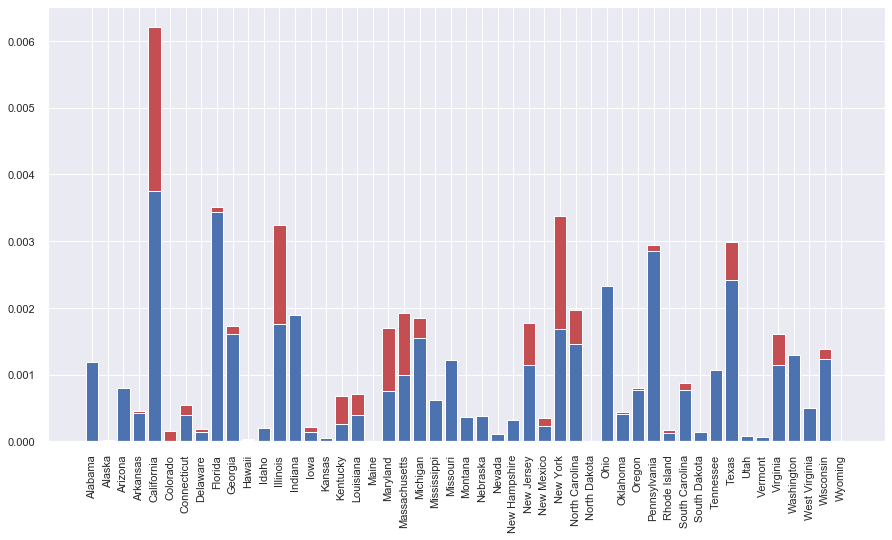

In [119]:
plt.figure(figsize=(15,8))
plt.bar(stateH, percentH, color = 'r')
plt.xticks(rotation=90)
plt.bar(state, percent, color = 'b')
plt.xticks(rotation=90)
plt.show()

In [113]:
Hill

,candidate,state,party,votes,partyFrac,fips,area_name,Population,Black,Latino,...,Kurang Mampu,Density,Veteran,Rumah Tangga,Pengangguran,BlackownFirm,AsianowmFirm,LatinoownFirm,WomenownFirm,incomepercapita
0,Hillary Clinton,Alabama,Democrat,309928,0.802243,1000,Alabama,4849377,26.7,4.1,...,18.6,94.4,388865,1838683,311578,14.8,1.8,1.2,28.1,23680
1,Hillary Clinton,Alaska,Democrat,99,0.183673,2000,Alaska,736732,3.9,6.8,...,9.9,1.2,71004,251899,52991,1.5,3.1,0.0,25.9,32651
2,Hillary Clinton,Arizona,Democrat,235697,0.590576,4000,Arizona,6731484,4.7,30.5,...,17.9,56.3,522382,2370289,420233,2.0,3.3,10.7,28.1,25358
3,Hillary Clinton,Arkansas,Democrat,144580,0.690291,5000,Arkansas,2966369,15.6,7.0,...,19.2,56.0,237311,1129723,191530,5.5,1.4,2.3,24.5,22170
4,Hillary Clinton,California,Democrat,1940580,0.563692,6000,California,38802500,6.5,38.6,...,15.9,239.1,1893539,12542460,2983996,4.0,14.9,16.5,30.3,29527
5,Hillary Clinton,Colorado,Democrat,49256,0.406456,8000,Colorado,5355866,4.5,21.2,...,13.2,48.5,399458,1977591,447586,1.7,2.6,6.2,29.2,31109
6,Hillary Clinton,Connecticut,Democrat,170075,0.527389,9000,Connecticut,3596677,11.5,15.0,...,10.2,738.1,217947,1355849,263511,4.4,3.3,4.2,28.1,37892
7,Hillary Clinton,Delaware,Democrat,55950,0.604153,10000,Delaware,935614,22.2,8.9,...,11.7,460.8,75081,335707,56861,8.7,4.0,2.1,26.1,29819
8,Hillary Clinton,Florida,Democrat,1097400,0.659494,12000,Florida,19893297,16.8,24.1,...,16.3,350.6,1569406,7158980,1838864,9.0,3.2,22.4,28.9,26236
9,Hillary Clinton,Georgia,Democrat,543008,0.716994,13000,Georgia,10097343,31.5,9.3,...,18.2,168.4,690208,3518097,816360,20.4,5.1,3.6,30.9,25182


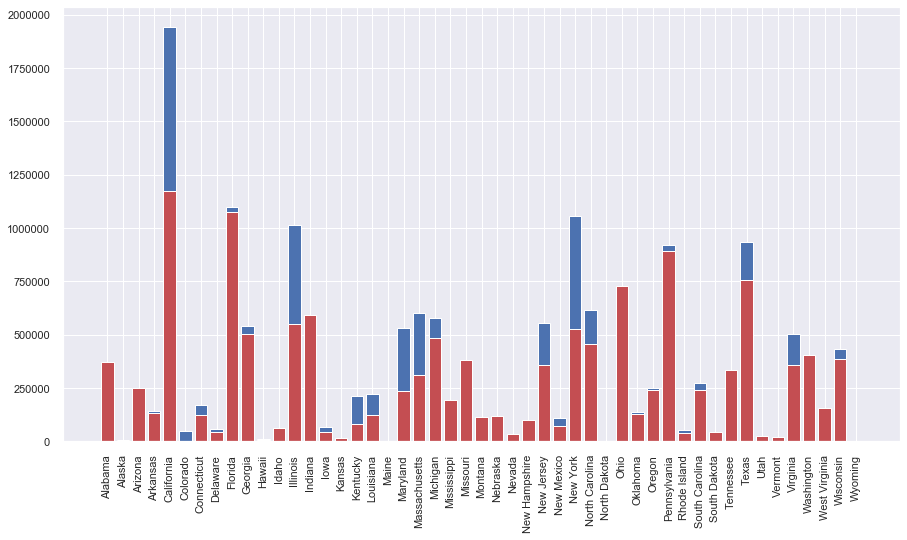

In [129]:
plt.figure(figsize=(15,8))
plt.bar(Hill.state, Hill.votes, color = 'b')
plt.xticks(rotation=90)
plt.bar(DNT.state,DNT.votes, color = 'r')
plt.xticks(rotation=90)
plt.show()

In [120]:
total = primary['votes'].sum()
percentH= (Hill['votes']/total)
stateH= Hill['state']
percent= (DNT['votes']/total)
state= DNT['state']

In [137]:
percentH.sum().mean()

0.27647422081644685

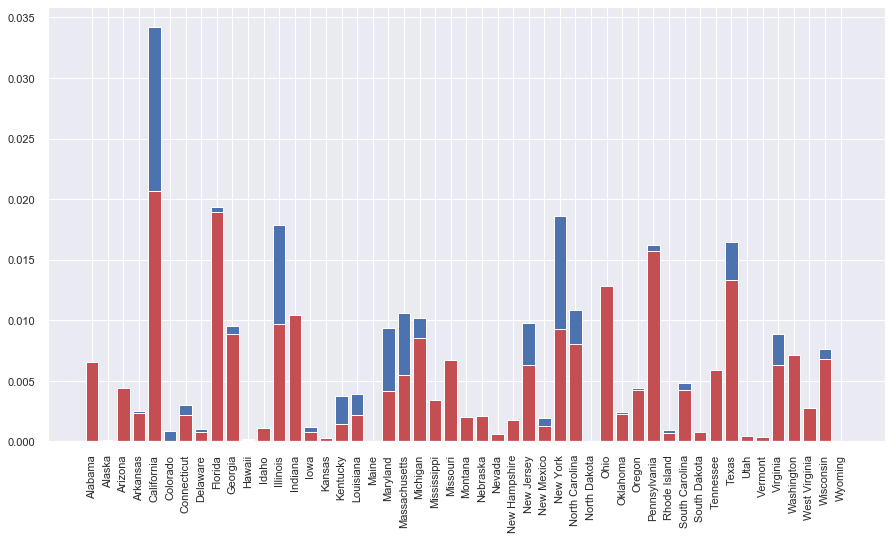

In [123]:
plt.figure(figsize=(15,8))
plt.bar(stateH, percentH, color = 'b')
plt.xticks(rotation=90)
plt.bar(state,percent, color = 'r')
plt.xticks(rotation=90)
plt.show()